# Import Libraries and Data

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV, calibration_curve

In [2]:
# Loading Dataset
raw_data = pd.read_csv("Selected_Features.csv")
raw_data.head()

,gender,age,mortality,Heart Rate,Heart rate Alarm - High,Heart Rate Alarm - Low,Non Invasive Blood Pressure systolic,Non Invasive Blood Pressure diastolic,Respiratory Rate,SpO2 Desat Limit,...,ethnicity_new,Chronic systolic (congestive) heart failure,Atrial fibrillation,"Hyperlipidemia, unspecified","Chronic obstructive pulmonary disease, unspecified-2","Chronic obstructive pulmonary disease, unspecified",Unspecified atrial fibrillation,Types_of_MI,Types_of_Heart_Failure,Hyperlipidemia
0,0,76,0,103,160.0,85.0,157.0,88.0,25.0,88.0,...,24,0,1,0,0,0,0,0,0,1
1,0,80,1,155,130.0,50.0,121.0,88.0,35.0,85.0,...,5,1,1,1,0,0,1,1,1,0
2,0,59,0,102,155.0,40.0,134.0,72.0,20.0,85.0,...,19,0,0,1,0,0,0,0,0,0
3,1,91,0,106,130.0,50.0,164.0,88.0,30.0,90.0,...,7,0,1,1,1,1,1,0,1,1
4,0,52,0,91,120.0,50.0,127.0,71.0,22.0,85.0,...,24,0,0,0,0,0,0,0,0,0


# Data Preparation

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   gender                                                2030 non-null   int64  
 1   age                                                   2030 non-null   int64  
 2   mortality                                             2030 non-null   int64  
 3   Heart Rate                                            2030 non-null   int64  
 4   Heart rate Alarm - High                               2030 non-null   float64
 5   Heart Rate Alarm - Low                                2030 non-null   float64
 6   Non Invasive Blood Pressure systolic                  2030 non-null   float64
 7   Non Invasive Blood Pressure diastolic                 2030 non-null   float64
 8   Respiratory Rate                                      2030

No missing values, all correct datatype, CHECK.

In [4]:
raw_data['mortality'].value_counts()

0    1850
1     180
Name: mortality, dtype: int64

In [5]:
 print(f"The data is unbalanced with {183/(183+1865)*100:.1f}% mortality rate.")

The data is unbalanced with 8.9% mortality rate.


In [6]:
raw_data.columns

Index(['gender', 'age', 'mortality', 'Heart Rate', 'Heart rate Alarm - High',
       'Heart Rate Alarm - Low', 'Non Invasive Blood Pressure systolic',
       'Non Invasive Blood Pressure diastolic', 'Respiratory Rate',
       'SpO2 Desat Limit', 'Prothrombin time', 'Anion gap',
       'Creatinine (serum)', 'Potassium, Whole Blood-2', 'Bicarbonate',
       'GCS - Eye Opening', 'Hemoglobin-2', 'Hematocrit', 'Platelet Count',
       'age_group', 'ethnicity_new',
       'Chronic systolic (congestive) heart failure', 'Atrial fibrillation',
       'Hyperlipidemia, unspecified',
       'Chronic obstructive pulmonary disease, unspecified-2',
       'Chronic obstructive pulmonary disease, unspecified',
       'Unspecified atrial fibrillation', 'Types_of_MI',
       'Types_of_Heart_Failure', 'Hyperlipidemia'],
      dtype='object')

In [7]:
features = ['gender', 'age', 'Heart Rate', 'Heart rate Alarm - High',
       'Heart Rate Alarm - Low', 'Non Invasive Blood Pressure systolic',
       'Non Invasive Blood Pressure diastolic', 'Respiratory Rate',
       'SpO2 Desat Limit', 'Prothrombin time', 'Anion gap',
       'Creatinine (serum)', 'Potassium, Whole Blood-2', 'Bicarbonate',
       'GCS - Eye Opening', 'Hemoglobin-2', 'Hematocrit', 'Platelet Count',
       'age_group', 'ethnicity_new',
       'Chronic systolic (congestive) heart failure', 'Atrial fibrillation',
       'Hyperlipidemia, unspecified',
       'Chronic obstructive pulmonary disease, unspecified-2',
       'Chronic obstructive pulmonary disease, unspecified',
       'Unspecified atrial fibrillation', 'Types_of_MI',
       'Types_of_Heart_Failure', 'Hyperlipidemia']

In [8]:
X = raw_data[features]
y = raw_data['mortality']

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [10]:
# Undersampling the training set
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

0    123
1    123
Name: mortality, dtype: int64

In [11]:
#Undersampling the test set

In [12]:
rus = RandomUnderSampler(random_state=42)
X_test_rus, y_test_rus= rus.fit_resample(X_test, y_test)

y_test_rus.value_counts()

0    57
1    57
Name: mortality, dtype: int64

# Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

## Untuned Model Performance

### Balanced Data - Undersampling technique

In [13]:
# Creating a Random Forest Model
rfc = RandomForestClassifier()

# Model Training
rfc_rus = rfc.fit(X_train_rus, y_train_rus)

# Get Prediction Values
y_pred_rus = rfc_rus.predict(X_test_rus)

print("Accuracy:",metrics.accuracy_score(y_test_rus, y_pred_rus))

Accuracy: 0.8157894736842105


Accuracy dropped from 0.87 => 0.77

## Grid Search

### Balanced Data

In [14]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [50, 100, 250, 500],
    "min_samples_split": range(2, 5),
    "min_samples_leaf": range(1, 4)
}

search_rus = GridSearchCV(rfc_rus, params, n_jobs = -1, cv = 10, verbose = 2)

search_rus.fit(X_train_rus, y_train_rus)

# GridSearchCV results
print("tuned hpyerparameters: (best parameters)", search_rus.best_params_)
print("accuracy :", search_rus.best_score_)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
tuned hpyerparameters: (best parameters) {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
accuracy : 0.8905000000000001


In [15]:
# In case I lose the grid search results above
# fit the best hyperparameter in the data
search_rus = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, min_samples_split = 3, min_samples_leaf = 3)
search_rus = search_rus.fit(X_train_rus, y_train_rus)

# Results from Best Models

In [16]:
y_prob = search_rus.predict_proba(X_test_rus)
y_prob_rus = search_rus.predict_proba(X_test_rus)

## 2. ROC Curves

In [17]:
# AUC score
rus_auc = roc_auc_score(y_test_rus, y_prob_rus[:,1])
print(f"For the best models: \nBalanced Data AUC = {rus_auc}")

For the best models: 
Balanced Data AUC = 0.8630347799322868


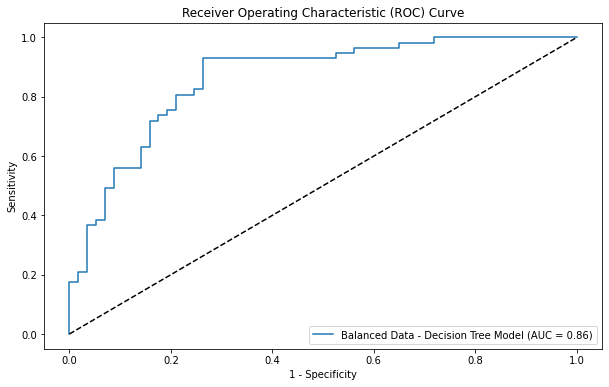

In [18]:
# fpr - false positive rate
# tpr - true positive rate
# threshold - part of the decision function used to calculate fpr and tpr

fpr_rus, tpr_rus, threshold_rus = roc_curve(y_test_rus, y_prob_rus[:,1])


plt.figure(figsize = (10, 6))

plt.plot(fpr_rus, tpr_rus, label = f'Balanced Data - Decision Tree Model (AUC = {rus_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random classifier

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

## 3. Classification Reports

In [19]:
y_pred_rus = search_rus.predict(X_test_rus)

In [20]:
print("Classification Report: Balanced Data & Uncalibrated")
print(classification_report(y_test_rus, y_pred_rus, target_names = ['Survival', 'Death']))

Classification Report: Balanced Data & Uncalibrated
              precision    recall  f1-score   support

    Survival       0.79      0.79      0.79        57
       Death       0.79      0.79      0.79        57

    accuracy                           0.79       114
   macro avg       0.79      0.79      0.79       114
weighted avg       0.79      0.79      0.79       114



## 4. Importance Graphs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


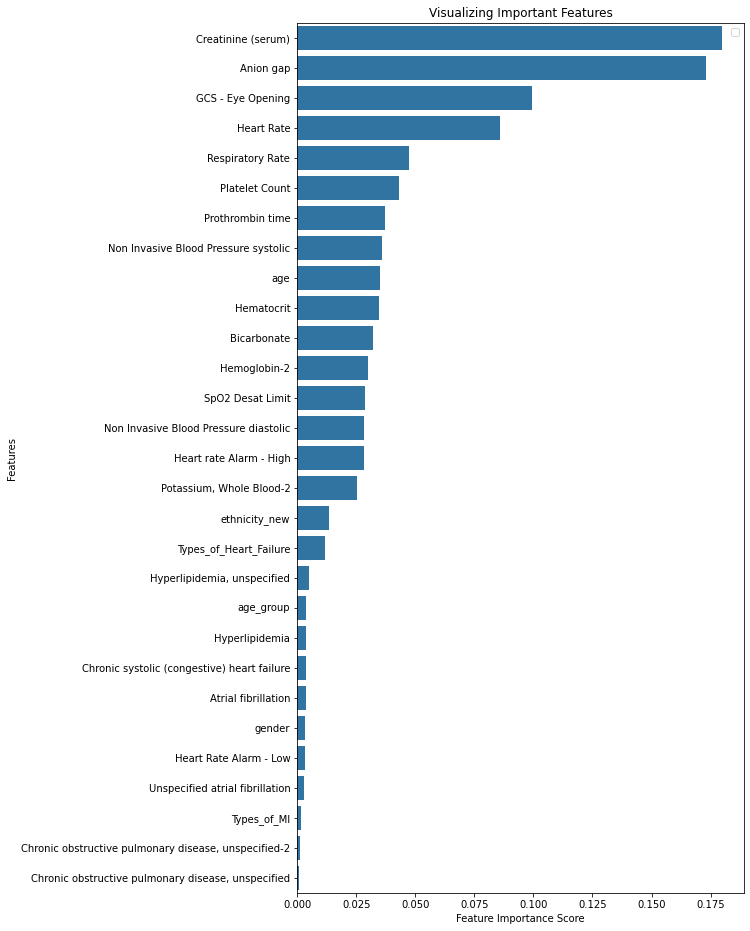

In [21]:
feature_imp = pd.Series(search_rus.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

plt.figure(figsize = (8, 16))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

